1. Загрузка библиотек и предобработка данных

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel

In [165]:
df = pd.read_csv('heart_disease.csv')

In [166]:
df

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [167]:
df.columns = df.columns.str.strip()

In [168]:
df['sex'] = df['sex'].astype("category")
df['chest pain type'] = df['chest pain type'].astype("category")
df['fasting blood sugar > 120 mg/dl'] = df['fasting blood sugar > 120 mg/dl'].astype("category")
df['resting electrocardiographic results'] = df['resting electrocardiographic results'].astype('category')
df['exercise induced angina'] = df['exercise induced angina'].astype('category')
df['slope of peak'] = df['slope of peak'].astype('category')
df['thal'] = df['thal'].astype('category')
df['Disease'] = df['Disease'].astype('category')

In [169]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   age                                   270 non-null    int64   
 1   sex                                   270 non-null    category
 2   chest pain type                       270 non-null    category
 3   resting blood pressure                270 non-null    int64   
 4   serum cholestoral in mg/dl            270 non-null    int64   
 5   fasting blood sugar > 120 mg/dl       270 non-null    category
 6   resting electrocardiographic results  270 non-null    category
 7   maximum heart rate achieved           270 non-null    int64   
 8   exercise induced angina               270 non-null    category
 9   oldpeak                               270 non-null    float64 
 10  slope of peak                         270 non-null    category
 11  number

In [170]:
Y = df['Disease']
X = df.drop('Disease', axis=1)


2. Масштабирование признаков


In [171]:
X_processed = X.copy()
category_columns: list[str] = X_processed.select_dtypes(include=['category']).columns # собираем колонки помеченные как category
X_processed = pd.get_dummies(X_processed, columns=category_columns,drop_first=True)

In [172]:
X_processed

,age,resting blood pressure,serum cholestoral in mg/dl,maximum heart rate achieved,oldpeak,number of major vessels,sex_1,chest pain type_2,chest pain type_3,chest pain type_4,fasting blood sugar > 120 mg/dl_1,resting electrocardiographic results_1,resting electrocardiographic results_2,exercise induced angina_1,slope of peak_2,slope of peak_3,thal_6,thal_7
0,70,130,322,109,2.4,3,True,False,False,True,False,False,True,False,True,False,False,False
1,67,115,564,160,1.6,0,False,False,True,False,False,False,True,False,True,False,False,True
2,57,124,261,141,0.3,0,True,True,False,False,False,False,False,False,False,False,False,True
3,64,128,263,105,0.2,1,True,False,False,True,False,False,False,True,True,False,False,True
4,74,120,269,121,0.2,1,False,True,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,172,199,162,0.5,0,True,False,True,False,True,False,False,False,False,False,False,True
266,44,120,263,173,0.0,0,True,True,False,False,False,False,False,False,False,False,False,True
267,56,140,294,153,1.3,0,False,True,False,False,False,False,True,False,True,False,False,False
268,57,140,192,148,0.4,0,True,False,False,True,False,False,False,False,True,False,True,False


In [173]:
numeric_features = X_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = MinMaxScaler()
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])

In [174]:
X_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   age                                     270 non-null    float64
 1   resting blood pressure                  270 non-null    float64
 2   serum cholestoral in mg/dl              270 non-null    float64
 3   maximum heart rate achieved             270 non-null    float64
 4   oldpeak                                 270 non-null    float64
 5   number of major vessels                 270 non-null    float64
 6   sex_1                                   270 non-null    bool   
 7   chest pain type_2                       270 non-null    bool   
 8   chest pain type_3                       270 non-null    bool   
 9   chest pain type_4                       270 non-null    bool   
 10  fasting blood sugar > 120 mg/dl_1       270 non-null    bool  

In [175]:
X_processed

,age,resting blood pressure,serum cholestoral in mg/dl,maximum heart rate achieved,oldpeak,number of major vessels,sex_1,chest pain type_2,chest pain type_3,chest pain type_4,fasting blood sugar > 120 mg/dl_1,resting electrocardiographic results_1,resting electrocardiographic results_2,exercise induced angina_1,slope of peak_2,slope of peak_3,thal_6,thal_7
0,0.854167,0.339623,0.447489,0.290076,0.387097,1.000000,True,False,False,True,False,False,True,False,True,False,False,False
1,0.791667,0.198113,1.000000,0.679389,0.258065,0.000000,False,False,True,False,False,False,True,False,True,False,False,True
2,0.583333,0.283019,0.308219,0.534351,0.048387,0.000000,True,True,False,False,False,False,False,False,False,False,False,True
3,0.729167,0.320755,0.312785,0.259542,0.032258,0.333333,True,False,False,True,False,False,False,True,True,False,False,True
4,0.937500,0.245283,0.326484,0.381679,0.032258,0.333333,False,True,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.479167,0.735849,0.166667,0.694656,0.080645,0.000000,True,False,True,False,True,False,False,False,False,False,False,True
266,0.312500,0.245283,0.312785,0.778626,0.000000,0.000000,True,True,False,False,False,False,False,False,False,False,False,True
267,0.562500,0.433962,0.383562,0.625954,0.209677,0.000000,False,True,False,False,False,False,True,False,True,False,False,False
268,0.583333,0.433962,0.150685,0.587786,0.064516,0.000000,True,False,False,True,False,False,False,False,True,False,True,False


3. Очистка данных и удаление выбросов

In [176]:
from sklearn.model_selection import cross_val_score

def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model

In [177]:
train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.8657
Точность на тестовой выборке: 0.8519

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.79      0.92      0.85        24

    accuracy                           0.85        54
   macro avg       0.85      0.86      0.85        54
weighted avg       0.86      0.85      0.85        54



LogisticRegression(max_iter=1000)

Метод 1: удаление на основе медианы

In [178]:
def remove_outliers_based_on_iqr(X, y, iqr_multiplier=1.5):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем первый и третий квартили для каждой числовой переменной
    Q1 = X_numeric.quantile(0.25)
    Q3 = X_numeric.quantile(0.75)

    # Вычисляем межквартильный размах (IQR)
    IQR = Q3 - Q1

    # Оставляем только те значения, которые находятся в диапазоне [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
    X_filtered = X_numeric[~((X_numeric < (Q1 - iqr_multiplier * IQR)) | (X_numeric > (Q3 + iqr_multiplier * IQR))).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered


In [179]:
X_iqr, y_iqr = remove_outliers_based_on_iqr(X_processed, Y, iqr_multiplier=3)

In [180]:
X_processed.describe()

,age,resting blood pressure,serum cholestoral in mg/dl,maximum heart rate achieved,oldpeak,number of major vessels
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,0.529861,0.352306,0.282327,0.600594,0.169355,0.223457
std,0.189772,0.168506,0.118005,0.176838,0.184711,0.314632
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.245283,0.198630,0.473282,0.000000,0.000000
50%,0.541667,0.339623,0.271689,0.629771,0.129032,0.000000
75%,0.666667,0.433962,0.351598,0.725191,0.258065,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [181]:
X_iqr.describe()

,age,resting blood pressure,serum cholestoral in mg/dl,maximum heart rate achieved,oldpeak,number of major vessels
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,0.528762,0.350465,0.279323,0.600775,0.167248,0.222637
std,0.189793,0.164144,0.109830,0.177262,0.183008,0.314343
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.390625,0.245283,0.198059,0.471374,0.000000,0.000000
50%,0.541667,0.339623,0.270548,0.629771,0.129032,0.000000
75%,0.666667,0.433962,0.344749,0.727099,0.258065,0.333333
max,1.000000,0.924528,0.664384,1.000000,1.000000,1.000000


In [182]:
train_and_evaluate(X_iqr, y_iqr)

Точность на обучающей выборке: 0.7710
Точность на тестовой выборке: 0.8333

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.80      0.83      0.82        24

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54



LogisticRegression(max_iter=1000)

Большинство данных сохранили, удалили совсем немного выбросов. mean и std остались близки к исходному, а некоторые максимальное значения перестали быть экстремально большими (холестирин и пульс)

Метод 2: удаление на основе среднего

In [183]:
def remove_outliers_based_on_mean(X, y, mean_multiplier=2):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем среднее значение и стандартное отклонение для каждой переменной
    mean_values = X_numeric.mean()
    std_values = X_numeric.std()

    # Устанавливаем верхний и нижний пороги на основе среднего значения и множителя стандартного отклонения
    lower_threshold = mean_values - mean_multiplier * std_values
    upper_threshold = mean_values + mean_multiplier * std_values

    # Фильтруем наблюдения, которые находятся в пределах этих порогов по всем признакам
    X_filtered = X_numeric[~((X_numeric < lower_threshold) | (X_numeric > upper_threshold)).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered

In [184]:
X_mean, y_mean = remove_outliers_based_on_mean(X_processed.copy(), Y.copy())

In [185]:
X_processed.describe()

,age,resting blood pressure,serum cholestoral in mg/dl,maximum heart rate achieved,oldpeak,number of major vessels
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,0.529861,0.352306,0.282327,0.600594,0.169355,0.223457
std,0.189772,0.168506,0.118005,0.176838,0.184711,0.314632
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.245283,0.198630,0.473282,0.000000,0.000000
50%,0.541667,0.339623,0.271689,0.629771,0.129032,0.000000
75%,0.666667,0.433962,0.351598,0.725191,0.258065,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [186]:
X_mean.describe()

,age,resting blood pressure,serum cholestoral in mg/dl,maximum heart rate achieved,oldpeak,number of major vessels
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,0.517193,0.328036,0.272133,0.621841,0.140855,0.163430
std,0.174254,0.139578,0.094421,0.154076,0.151473,0.239105
min,0.166667,0.056604,0.052511,0.259542,0.000000,0.000000
25%,0.375000,0.245283,0.196918,0.526718,0.000000,0.000000
50%,0.520833,0.339623,0.267123,0.648855,0.096774,0.000000
75%,0.645833,0.433962,0.331050,0.740458,0.241935,0.333333
max,0.875000,0.622642,0.518265,0.938931,0.516129,0.666667


In [187]:
train_and_evaluate(X_mean, y_mean)

Точность на обучающей выборке: 0.7439
Точность на тестовой выборке: 0.7619

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        26
           1       0.80      0.50      0.62        16

    accuracy                           0.76        42
   macro avg       0.78      0.71      0.72        42
weighted avg       0.77      0.76      0.75        42



LogisticRegression(max_iter=1000)

Удалили больше выбрсов (270->206), некоторые средние значения снизились, вероятно были выбросы в виде экстремально больших значений, об этом так же свидетельствует снижение максимума по всем столбцам

Используя метод удаления на основе среднего сократилось больше данных, 270 -> 206. Удаляя по медиане теряем меньше данных (270->268). Точность обученя при использовании медианы выше (86% против 76%). Вывод - удаление на основе медианы в данном случае лучше, в целом это было очевидно, т.к. выбросов не очень много

3. Методы отбора признаков

Filter методы

In [188]:
from sklearn.feature_selection import SelectKBest, f_regression

In [189]:
selector = SelectKBest(score_func=chi2, k=5)
X_kbest = selector.fit_transform(X_processed, Y)

In [190]:
selector.scores_

array([8.24225917e-01, 5.23439649e-01, 1.84806178e-01, 2.45324144e+00,
       9.46730415e+00, 2.47075506e+01, 7.71147541e+00, 1.31250000e+01,
       1.68158228e+01, 3.55848837e+01, 6.12500000e-02, 2.50000000e-02,
       4.33613139e+00, 3.18224719e+01, 1.87688525e+01, 9.00000000e-01,
       9.14285714e-01, 4.18389423e+01])

In [191]:
X_processed.columns

Index(['age', 'resting blood pressure', 'serum cholestoral in mg/dl',
       'maximum heart rate achieved', 'oldpeak', 'number of major vessels',
       'sex_1', 'chest pain type_2', 'chest pain type_3', 'chest pain type_4',
       'fasting blood sugar > 120 mg/dl_1',
       'resting electrocardiographic results_1',
       'resting electrocardiographic results_2', 'exercise induced angina_1',
       'slope of peak_2', 'slope of peak_3', 'thal_6', 'thal_7'],
      dtype='object')

In [192]:
X_processed

,age,resting blood pressure,serum cholestoral in mg/dl,maximum heart rate achieved,oldpeak,number of major vessels,sex_1,chest pain type_2,chest pain type_3,chest pain type_4,fasting blood sugar > 120 mg/dl_1,resting electrocardiographic results_1,resting electrocardiographic results_2,exercise induced angina_1,slope of peak_2,slope of peak_3,thal_6,thal_7
0,0.854167,0.339623,0.447489,0.290076,0.387097,1.000000,True,False,False,True,False,False,True,False,True,False,False,False
1,0.791667,0.198113,1.000000,0.679389,0.258065,0.000000,False,False,True,False,False,False,True,False,True,False,False,True
2,0.583333,0.283019,0.308219,0.534351,0.048387,0.000000,True,True,False,False,False,False,False,False,False,False,False,True
3,0.729167,0.320755,0.312785,0.259542,0.032258,0.333333,True,False,False,True,False,False,False,True,True,False,False,True
4,0.937500,0.245283,0.326484,0.381679,0.032258,0.333333,False,True,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.479167,0.735849,0.166667,0.694656,0.080645,0.000000,True,False,True,False,True,False,False,False,False,False,False,True
266,0.312500,0.245283,0.312785,0.778626,0.000000,0.000000,True,True,False,False,False,False,False,False,False,False,False,True
267,0.562500,0.433962,0.383562,0.625954,0.209677,0.000000,False,True,False,False,False,False,True,False,True,False,False,False
268,0.583333,0.433962,0.150685,0.587786,0.064516,0.000000,True,False,False,True,False,False,False,False,True,False,True,False


In [193]:
selector.get_support(indices=True)

array([ 5,  9, 13, 14, 17], dtype=int64)

In [194]:
selected_features = X_processed.columns[selector.get_support(indices=True)]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['number of major vessels', 'chest pain type_4',
       'exercise induced angina_1', 'slope of peak_2', 'thal_7'],
      dtype='object')


In [195]:
X_kbest_df = pd.DataFrame(X_kbest, columns=selected_features)
train_and_evaluate(X_kbest_df, Y)

Точность на обучающей выборке: 0.8704
Точность на тестовой выборке: 0.8519

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        30
           1       0.81      0.88      0.84        24

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.86      0.85      0.85        54



LogisticRegression(max_iter=1000)

В модели много категориальных переменных, выбрала хи квадрат. Луший результат показвает при k=5

Wrapper методы

In [215]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Инициализируем модель логистической регрессии
base_model = LogisticRegression(max_iter=1000)

# Инициализируем RFE для выбора 5 лучших признаков
rfe = RFE(estimator=base_model, n_features_to_select=5)
rfe.fit(X_processed, Y)

# Получаем список отобранных признаков
selected_features = X_processed.columns[rfe.support_]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['maximum heart rate achieved', 'oldpeak', 'number of major vessels',
       'chest pain type_4', 'thal_7'],
      dtype='object')


In [216]:
# Отбираем признаки
X_rfe = X_processed[selected_features]

# Обучаем и оцениваем модель
model = train_and_evaluate(X_rfe, Y)

Точность на обучающей выборке: 0.8426
Точность на тестовой выборке: 0.8889

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        30
           1       0.85      0.92      0.88        24

    accuracy                           0.89        54
   macro avg       0.89      0.89      0.89        54
weighted avg       0.89      0.89      0.89        54



Embedded методы

Коэффициенты модели без регуляризации: [[ 0.25159106  0.95349126  0.65270313 -0.99314756  1.22069603  2.21811864
   1.08545631  0.2283889  -0.14461798  1.39400844 -0.19334158  0.20755439
   0.53475687  0.64803885  0.88907489  0.26812853  0.09496658  1.34874705]]
Коэффициенты модели с регуляризацией: [[ 0.          0.67034408  0.         -1.92862274  1.44022779  2.49529364
   0.87390013  0.         -0.2200544   1.2675549   0.          0.
   0.44332346  0.51679206  0.68784619  0.          0.          1.38916612]]
Отобранные признаки: Index(['resting blood pressure', 'maximum heart rate achieved', 'oldpeak',
       'number of major vessels', 'sex_1', 'chest pain type_3',
       'chest pain type_4', 'resting electrocardiographic results_2',
       'exercise induced angina_1', 'slope of peak_2', 'thal_7'],
      dtype='object')
Коэффициенты модели после отбора признаков: [[ 0.67029656 -1.92842445  1.44028753  2.49526894  0.87391792 -0.22004954
   1.26755987  0.44331933  0.51683798  0.687849

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


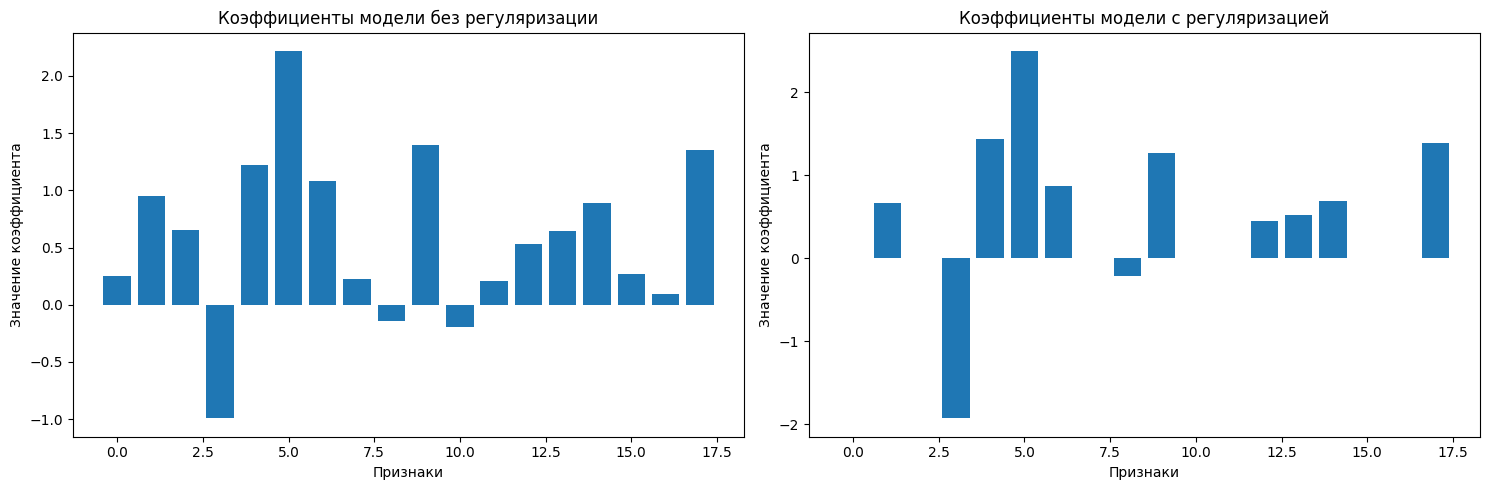

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import numpy as np
import matplotlib.pyplot as plt

# Обучаем модель без регуляризации
model_no_penalty = LogisticRegression(solver='lbfgs', max_iter=1000)
model_no_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели без регуляризации
coefficients_no_penalty = model_no_penalty.coef_
print("Коэффициенты модели без регуляризации:", coefficients_no_penalty)

# Инициализируем модель с L1-регуляризацией
model_with_penalty = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Обучаем модель с регуляризацией
model_with_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели с регуляризацией
coefficients_with_penalty = model_with_penalty.coef_
print("Коэффициенты модели с регуляризацией:", coefficients_with_penalty)

# Используем SelectFromModel для отбора признаков
selector = SelectFromModel(model_with_penalty, prefit=True)
X_embedded = selector.transform(X_processed)

# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support()]
print("Отобранные признаки:", selected_features)

# Обучаем модель на отобранных признаках
model_embedded = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_embedded.fit(X_embedded, Y)

# Выводим коэффициенты модели после отбора признаков
coefficients_embedded = model_embedded.coef_
print("Коэффициенты модели после отбора признаков:", coefficients_embedded)

# Визуализация коэффициентов моделей
plt.figure(figsize=(15, 5))

# Коэффициенты модели без регуляризации
plt.subplot(1, 2, 1)
plt.bar(range(len(coefficients_no_penalty[0])), coefficients_no_penalty[0])
plt.title("Коэффициенты модели без регуляризации")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

# Коэффициенты модели с регуляризацией
plt.subplot(1, 2, 2)
plt.bar(range(len(coefficients_with_penalty[0])), coefficients_with_penalty[0])
plt.title("Коэффициенты модели с регуляризацией")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

plt.tight_layout()
plt.show()

In [202]:
X_embedded_df = pd.DataFrame(X_embedded, columns=selected_features)

In [203]:
model = train_and_evaluate(X_embedded_df, Y)

Точность на обучающей выборке: 0.8750
Точность на тестовой выборке: 0.8519

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.79      0.92      0.85        24

    accuracy                           0.85        54
   macro avg       0.85      0.86      0.85        54
weighted avg       0.86      0.85      0.85        54



Кросс-валидация

In [221]:
# Импорт необходимых библиотек
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, train_test_split, cross_val_score

K-Fold Cross-Validation

In [238]:
def k_fold_cross_validation(X, y, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    for train_index, test_index in kf.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    print(f"K-Fold Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому фолду: {accuracies}")

k_fold_cross_validation(X = X_processed.to_numpy(), y = Y.to_numpy()) 

K-Fold Cross-Validation - Средняя точность: 0.845054945054945
Точности по каждому фолду: [0.8571428571428571, 0.7857142857142857, 0.7142857142857143, 1.0, 0.7857142857142857, 0.8571428571428571, 0.8571428571428571, 0.7142857142857143, 0.7857142857142857, 0.9285714285714286, 0.9230769230769231, 0.9230769230769231, 0.8461538461538461, 0.7692307692307693, 0.9230769230769231, 0.9230769230769231, 0.8461538461538461, 0.8461538461538461, 0.6923076923076923, 0.9230769230769231]


Разбила на 10 фолдов, т.к. данных не очень много. Точность варьируется от 69% до 100%, большая часть фолдов показала точность >80%, модель хорошо классифицировала данные

ShuffleSplit Cross-Validation

In [246]:
def shuffle_split_cross_validation(X, y, n_splits=10, test_size=0.4):
    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size)
    accuracies = []

    # Реализация ShuffleSplit вручную
    for train_index, test_index in ss.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому разделению
    print(f"ShuffleSplit Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому разделению: {accuracies}")

# Пример использования:
shuffle_split_cross_validation(X_processed.to_numpy(), Y.to_numpy())

ShuffleSplit Cross-Validation - Средняя точность: 0.8388888888888889
Точности по каждому разделению: [0.8240740740740741, 0.8518518518518519, 0.8148148148148148, 0.7962962962962963, 0.7962962962962963, 0.9074074074074074, 0.8981481481481481, 0.8240740740740741, 0.8518518518518519, 0.8240740740740741]


Большинство результатов находится в диапазоне 82-85%, средняя точность довольно высокая

Train-Test-Validation Split

In [241]:
def train_test_validation_split(X, y):
    model = LogisticRegression(max_iter=1000)
    # Разделяем данные на тренировочные и оставшиеся (валидация + тест)
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

    # Разделяем оставшиеся данные на валидационные и тестовые
    X_train_train, X_test, y_train_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Обучаем модель на тренировочных данных
    model.fit(X_train_train, y_train_train)

    # Оцениваем на валидационных данных
    y_valid_pred = model.predict(X_validation)
    validation_accuracy = accuracy_score(y_validation, y_valid_pred)
    print(f"Точность на валидационных данных: {validation_accuracy}")

    # Оцениваем на тестовых данных
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Точность на тестовых данных: {test_accuracy}")

# Пример использования:
train_test_validation_split(X_processed.to_numpy(), Y.to_numpy())


Точность на валидационных данных: 0.8333333333333334
Точность на тестовых данных: 0.8636363636363636


Модель хорошо обобщает данные, не использованные при обучении, так же нет признаков переобучения, т.е. точность на тестовых выше чем на валидационной

Имеем:
1. Небольшой набор данных (270 записей)
2. Медицинские данные (важна точность)

Вывод:

В этом случае лучше использовать K-fold Cross Validation, используя другие методы можем потерять много данных. Однако модель стабильно работает при разных способах